<center><h1>Graph</h1></center>
<hr/>

#### Imports

In [11]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#### Data

In [119]:
story = "\n".join(pd.read_table("data/our_data/Cinderella.txt", header=None)[0])

In [120]:
ann = json.load(open("data/our_data/Cinderella.json"))

In [121]:
G = nx.MultiGraph(name="Cinderella")

In [122]:
ann

{'Characters': ['cinderella',
  'stepmother',
  'sisters',
  'godmother',
  'prince',
  'king',
  'queen'],
 'Relationships': {'cinderella': [['stepmother', -1],
   ['sisters', -1],
   ['godmother', 1],
   ['prince', 1]],
  'stepmother': [['cinderella', -1], ['sisters', 1]],
  'sisters': [['cinderella', -1], ['stepmother', 1]],
  'godmother': [['cinderella', 1]],
  'prince': [['cinderella', 1]],
  'king': [['cinderella', 1], ['queen', 0]],
  'queen': [['king', 0]]},
 'Protagonist': 'cinderella',
 'Antagonist': ''}

In [ ]:
def knowledge_graph(info, name = 'Knowdlege Graph'):
    # info is dictionary with 'Characters' and 'Relationships'
    
    color_map= {-1: 'red', 0: 'black', 1: 'green'}    
    G = nx.MultiGraph(name=name)

    for character in info['Characters']:
        G.add_node(character)

    for character1, characters in info['Relationships'].items():
        for character2, relationship in characters:
            G.add_edge(character1, character2, value = relationship)

    edge_colors = [color_map[rel['value']] for ch1, ch2, rel in G.edges(data=True)]
    node_sizes  = [v * 100 for v in dict(G.degree()).values()]
    
    nx.draw_circular(G, edge_color=edge_colors, node_size=node_sizes, with_labels=True)
    plt.show()

In [123]:
for character in ann['Characters']:
    G.add_node(character)

In [124]:
for character1, characters in ann['Relationships'].items():
    for character2, relationship in characters:
        G.add_edge(character1, character2, value = relationship)
        # print(character1, character2, relationship)

In [125]:
color_dict = {-1: 'red', 0: 'black', 1: 'green'}
colors = [color_dict[rel['value']] for ch1, ch2, rel in G.edges(data=True)]

In [128]:
def show(G, colors):
    nx.draw_circular(G, edge_color=colors, with_labels=True, node_size=[v * 100 for v in dict(G.degree()).values()])
    plt.show()

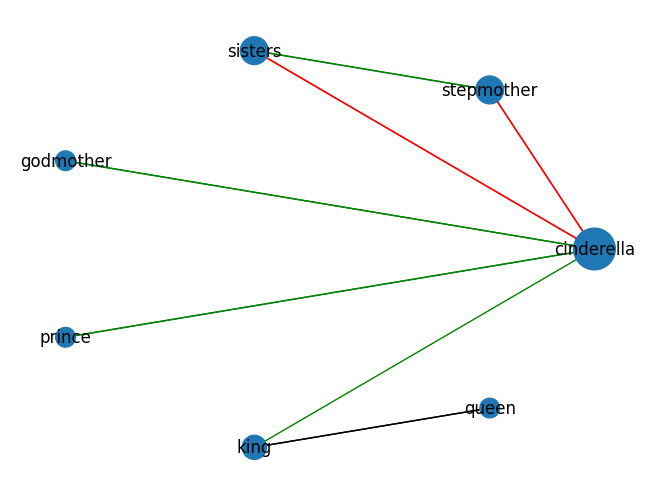

In [129]:
show(G, colors)